In [1]:
## Overview

In [2]:
# df - main dataframe 

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import re
import warnings
import os
warnings.filterwarnings('ignore')

## Reading CSV data

In [3]:
current_dir = os.getcwd()

print(current_dir)

/home/jovyan/ukol1_tmp


In [4]:
raw_data = pd.read_csv("incident_event_log.csv")
metadata = pd.read_csv("irt_metadata_csv.csv")
df = raw_data

In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


## Metadata - Attribute Descriptions

In [7]:
metadata

,Attribute,Description
0,1. number,"incident identifier (24,918 different values);"
1,2. incident state,eight levels controlling the incident managem...
2,3. active,boolean attribute that shows whether the reco...
3,4. reassignment_count,number of times the incident has the group or...
4,5. reopen_count,number of times the incident resolution was r...
5,6. sys_mod_count,number of incident updates until that moment;
6,7. made_sla,boolean attribute that shows whether the inci...
7,8. caller_id,identifier of the user affected;
8,9. opened_by,identifier of the user who reported the incid...
9,10. opened_at,incident user opening date and time;


## Data types

In [8]:
df.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

In [9]:
# Label columns
def add_prefix(df_arg):
    for column in df_arg.columns:
        if df_arg[column].dtype == 'object':
            df_arg = df_arg.rename(columns={column: 'C_' + column})
        elif df_arg[column].dtype == 'float64' or df_arg[column].dtype == 'int64':
            df_arg = df_arg.rename(columns={column: 'N_' + column})
        elif df_arg[column].dtype == 'bool' or df_arg[column].dtype == 'bool':
            df_arg = df_arg.rename(columns={column: 'C_' + column})
    return df_arg

df = add_prefix(df)

In [10]:
df = df.rename(columns={'C_opened_at':'N_opened_at','C_sys_created_at':'N_sys_created_at','C_sys_updated_at':'N_sys_updated_at','C_resolved_at':'N_resolved_at','C_closed_at':'N_closed_at'})

In [11]:
# úprava datumových formátů
dt_columns = ['N_opened_at','N_sys_created_at','N_sys_updated_at','N_resolved_at','N_closed_at']
date_time = df[dt_columns]
date_time = date_time.apply(lambda x: pd.to_datetime(x, dayfirst=True, format='%d/%m/%Y %H:%M', errors='coerce'))
date_time.head()

,N_opened_at,N_sys_created_at,N_sys_updated_at,N_resolved_at,N_closed_at
0,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-02-29 01:23:00,2016-02-29 11:29:00,2016-03-05 12:00:00
1,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-02-29 08:53:00,2016-02-29 11:29:00,2016-03-05 12:00:00
2,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-02-29 11:29:00,2016-02-29 11:29:00,2016-03-05 12:00:00
3,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-03-05 12:00:00,2016-02-29 11:29:00,2016-03-05 12:00:00
4,2016-02-29 04:40:00,2016-02-29 04:57:00,2016-02-29 04:57:00,2016-03-01 09:52:00,2016-03-06 10:00:00


In [12]:
df[date_time.columns] = date_time

In [13]:
# Calculating the difference between resolved_at and opened_at
df['T_hours'] = (date_time['N_resolved_at'] - date_time['N_opened_at']).dt.total_seconds() / 3600
df[['N_opened_at', 'N_resolved_at', 'T_hours']].head(10)

,N_opened_at,N_resolved_at,T_hours
0,2016-02-29 01:16:00,2016-02-29 11:29:00,10.216667
1,2016-02-29 01:16:00,2016-02-29 11:29:00,10.216667
2,2016-02-29 01:16:00,2016-02-29 11:29:00,10.216667
3,2016-02-29 01:16:00,2016-02-29 11:29:00,10.216667
4,2016-02-29 04:40:00,2016-03-01 09:52:00,29.200000
5,2016-02-29 04:40:00,2016-03-01 09:52:00,29.200000
6,2016-02-29 04:40:00,2016-03-01 09:52:00,29.200000
7,2016-02-29 04:40:00,2016-03-01 09:52:00,29.200000
8,2016-02-29 04:40:00,2016-03-01 09:52:00,29.200000
9,2016-02-29 04:40:00,2016-03-01 09:52:00,29.200000


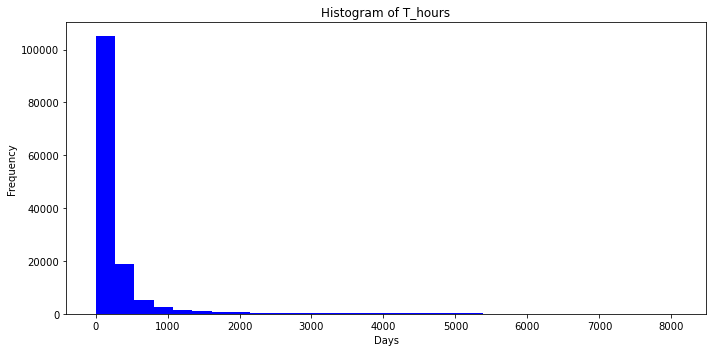

count    138571.000000
mean        269.596262
std         650.867377
min           0.000000
2.5%          0.050000
10%           0.216667
25%           4.066667
50%          73.516667
75%         262.183333
90%         568.250000
97.5%      2060.933333
max        8070.166667
Name: T_hours, dtype: float64

In [14]:
plt.figure(figsize=(10, 5))
plt.hist(df['T_hours'], bins=30, color='blue')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Histogram of T_hours')

plt.tight_layout()
plt.show()

perc = [0.025, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975]
display(df['T_hours'].describe(percentiles=perc))

In [15]:
df.isna().sum()

C_number                         0
C_incident_state                 0
C_active                         0
N_reassignment_count             0
N_reopen_count                   0
N_sys_mod_count                  0
C_made_sla                       0
C_caller_id                      0
C_opened_by                      0
N_opened_at                      0
C_sys_created_by                 0
N_sys_created_at             53076
C_sys_updated_by                 0
N_sys_updated_at                 0
C_contact_type                   0
C_location                       0
C_category                       0
C_subcategory                    0
C_u_symptom                      0
C_cmdb_ci                        0
C_impact                         0
C_urgency                        0
C_priority                       0
C_assignment_group               0
C_assigned_to                    0
C_knowledge                      0
C_u_priority_confirmation        0
C_notify                         0
C_problem_id        

In [16]:
# Treat "?" as NA value
df.apply(lambda x: x[x == "?"].count())

C_number                          0
C_incident_state                  0
C_active                          0
N_reassignment_count              0
N_reopen_count                    0
N_sys_mod_count                   0
C_made_sla                        0
C_caller_id                      29
C_opened_by                    4835
N_opened_at                       0
C_sys_created_by              53076
N_sys_created_at                  0
C_sys_updated_by                  0
N_sys_updated_at                  0
C_contact_type                    0
C_location                       76
C_category                       78
C_subcategory                   111
C_u_symptom                   32964
C_cmdb_ci                    141267
C_impact                          0
C_urgency                         0
C_priority                        0
C_assignment_group            14213
C_assigned_to                 27496
C_knowledge                       0
C_u_priority_confirmation         0
C_notify                    

In [17]:
df = df.replace({'?': pd.NA})
df.isna().sum(axis=0)

C_number                          0
C_incident_state                  0
C_active                          0
N_reassignment_count              0
N_reopen_count                    0
N_sys_mod_count                   0
C_made_sla                        0
C_caller_id                      29
C_opened_by                    4835
N_opened_at                       0
C_sys_created_by              53076
N_sys_created_at              53076
C_sys_updated_by                  0
N_sys_updated_at                  0
C_contact_type                    0
C_location                       76
C_category                       78
C_subcategory                   111
C_u_symptom                   32964
C_cmdb_ci                    141267
C_impact                          0
C_urgency                         0
C_priority                        0
C_assignment_group            14213
C_assigned_to                 27496
C_knowledge                       0
C_u_priority_confirmation         0
C_notify                    

## Check if incident has all events

In [18]:
# Group the DataFrame by the incident number and count the number of rows for each incident
incident_counts = df.groupby('C_number').size().reset_index(name='incident_count')

# Filter the DataFrame for rows where incident_state is "closed" and calculate the total sys_mod_count for each incident
closed_sys_mod_counts = df[df['C_incident_state'] == 'Closed'].groupby('C_number')['N_sys_mod_count'].sum().reset_index(name='N_sys_mod_count')

# Increment the sys_mod_count by 1 to account for starting at 0
closed_sys_mod_counts['N_sys_mod_count'] += 1

# Merge the incident_counts and closed_sys_mod_counts on the incident number
merged_counts = incident_counts.merge(closed_sys_mod_counts, on='C_number')

# Check if the number of sys_mod_count is equal to the number of rows for each incident
merged_counts['counts_equal'] = merged_counts['incident_count'] == merged_counts['N_sys_mod_count']

print("Are the number of sys_mod_count equal to the number of rows for each closed incident?")
print(merged_counts)

Are the number of sys_mod_count equal to the number of rows for each closed incident?
         C_number  incident_count  N_sys_mod_count  counts_equal
0      INC0000045               4                5         False
1      INC0000047               9                9          True
2      INC0000057               7                7          True
3      INC0000060               4                4          True
4      INC0000062               8                8          True
...           ...             ...              ...           ...
24913  INC0120304               3                3          True
24914  INC0120319               2                2          True
24915  INC0120495               6                6          True
24916  INC0120835               4                5         False
24917  INC0121064               4                4          True

[24918 rows x 4 columns]


## Check of False cases where sys_mod_count != incident_count

In [19]:
false_df = df[df['C_number'].isin(merged_counts[merged_counts['counts_equal'] == False]['C_number'])]
false_df = false_df[false_df['C_incident_state'] == 'Closed']
false_df

,C_number,C_incident_state,C_active,N_reassignment_count,N_reopen_count,N_sys_mod_count,C_made_sla,C_caller_id,C_opened_by,N_opened_at,...,C_notify,C_problem_id,C_rfc,C_vendor,C_caused_by,C_closed_code,C_resolved_by,N_resolved_at,N_closed_at,T_hours
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,10.216667
61,INC0000065,Closed,False,6,0,13,True,Caller 5323,Opened by 131,2016-02-29 07:38:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 1,Resolved by 197,2016-03-02 15:21:00,2016-03-07 16:00:00,55.716667
84,INC0000070,Closed,False,1,0,9,False,Caller 3757,Opened by 131,2016-02-29 08:11:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 11,Resolved by 30,2016-03-08 09:55:00,2016-03-24 18:40:00,193.733333
98,INC0000073,Closed,False,1,0,6,True,Caller 2519,Opened by 40,2016-02-29 08:22:00,...,Do Not Notify,Problem ID 2,<NA>,<NA>,<NA>,code 11,Resolved by 208,2016-03-01 15:37:00,2016-03-06 16:00:00,31.250000
104,INC0000074,Closed,False,0,0,19,False,Caller 527,Opened by 433,2016-02-29 08:23:00,...,Do Not Notify,<NA>,CHG0000404,<NA>,<NA>,code 6,Resolved by 158,2016-04-11 14:39:00,2016-04-16 15:07:00,1014.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141492,INC0114952,Closed,False,1,0,5,False,Caller 4426,Opened by 435,2017-01-31 22:36:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 7,Resolved by 8,2017-02-09 14:24:00,2017-02-14 15:00:00,207.800000
141567,INC0115739,Closed,False,0,0,4,False,Caller 2503,Opened by 239,2017-02-02 11:41:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 7,Resolved by 112,2017-02-08 09:27:00,2017-02-13 10:00:00,141.766667
141570,INC0115743,Closed,False,0,0,4,False,Caller 2503,Opened by 239,2017-02-02 11:44:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,Resolved by 112,2017-02-08 09:43:00,2017-02-13 10:00:00,141.983333
141669,INC0118999,Closed,False,0,0,6,True,Caller 2058,Opened by 194,2017-02-10 15:55:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,Resolved by 110,2017-02-10 16:35:00,2017-02-15 17:00:00,0.666667


In [20]:
false_df.describe()

,N_reassignment_count,N_reopen_count,N_sys_mod_count,T_hours
count,9337.000000,9337.000000,9337.000000,9326.000000
mean,1.689622,0.029881,12.296883,419.878453
std,2.068103,0.229718,11.695999,782.451819
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,6.000000,94.970833
50%,1.000000,0.000000,9.000000,192.200000
75%,2.000000,0.000000,14.000000,378.095833
max,27.000000,8.000000,129.000000,8070.166667


In [21]:
counts_equal_sum = merged_counts['counts_equal'].value_counts()

print("Counts of True and False values in counts_equal:")
print(counts_equal_sum)

Counts of True and False values in counts_equal:
True     15648
False     9270
Name: counts_equal, dtype: int64


## New df only with incidents with not missing events

In [22]:
df = df[df['C_number'].isin(merged_counts[merged_counts['counts_equal'] == True]['C_number'])]

In [23]:
# Jeden incident je řešen na 1-37 řádcích. Pro naše účely bychom zvali jen incidenty, které mají hodnotu v C_incident_state - closed
# U všech fází incidentů je stejný začátek N_sys_updated_at
df = df[df['C_incident_state'] == 'Closed']
df

,C_number,C_incident_state,C_active,N_reassignment_count,N_reopen_count,N_sys_mod_count,C_made_sla,C_caller_id,C_opened_by,N_opened_at,...,C_notify,C_problem_id,C_rfc,C_vendor,C_caused_by,C_closed_code,C_resolved_by,N_resolved_at,N_closed_at,T_hours
12,INC0000047,Closed,False,1,0,8,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00,29.200000
19,INC0000057,Closed,False,0,0,6,True,Caller 4416,Opened by 8,2016-02-29 06:10:00,...,Do Not Notify,Problem ID 2,<NA>,<NA>,<NA>,code 10,Resolved by 5,2016-03-01 02:55:00,2016-03-06 03:00:00,20.750000
23,INC0000060,Closed,False,0,0,3,True,Caller 4491,Opened by 180,2016-02-29 06:38:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 3,Resolved by 113,2016-03-02 12:06:00,2016-03-07 13:00:00,53.466667
31,INC0000062,Closed,False,1,0,7,False,Caller 3765,Opened by 180,2016-02-29 06:58:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 7,Resolved by 62,2016-02-29 15:51:00,2016-03-05 16:00:00,8.883333
39,INC0000063,Closed,False,1,0,7,True,Caller 2146,Opened by 180,2016-02-29 07:08:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 7,Resolved by 62,2016-02-29 16:01:00,2016-03-05 17:00:00,8.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141692,INC0120303,Closed,False,0,0,1,True,Caller 1866,Opened by 508,2017-02-15 01:52:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,<NA>,NaT,2017-02-15 01:52:00,NaN
141695,INC0120304,Closed,False,0,0,2,True,Caller 90,Opened by 8,2017-02-15 02:02:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,Resolved by 5,2017-02-17 00:47:00,2017-02-17 00:50:00,46.750000
141697,INC0120319,Closed,False,0,0,1,True,Caller 1899,Opened by 508,2017-02-15 07:09:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,<NA>,NaT,2017-02-15 07:09:00,NaN
141703,INC0120495,Closed,False,1,0,5,True,Caller 323,Opened by 14,2017-02-15 11:58:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,2017-02-16 09:51:00,NaN


In [24]:
df.describe()

,N_reassignment_count,N_reopen_count,N_sys_mod_count,T_hours
count,15648.000000,15648.000000,15648.000000,14101.000000
mean,0.495527,0.003515,3.351483,19.371779
std,0.933176,0.061305,2.272356,68.074611
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,0.183333
50%,0.000000,0.000000,3.000000,1.033333
75%,1.000000,0.000000,4.000000,22.850000
max,13.000000,2.000000,42.000000,5353.000000


In [ ]:
df['C_number'] = df['C_number'].drop_duplicates()
df

## Counting NA values

In [ ]:
df = df.replace({'?': pd.NA})
print(df.isna().sum(axis=0))

## Counting unique values

In [ ]:
unique_counts = df.dropna().nunique()
print(unique_counts)

## Edit DF - Missing values

In [ ]:
df

In [ ]:
# sys_created_at has 37 % values -> we use opened_at with no missing values
df = df.drop('N_sys_created_at', axis=1)

In [ ]:
# drop C_sys_created_by -> use opened_by
df = df.drop('C_sys_created_by', axis=1)

In [ ]:
# drop because of NA values
df = df.drop(columns=['C_cmdb_ci', 'C_problem_id', 'C_rfc', 'C_vendor', 'C_caused_by'])

In [ ]:
# drop of not needed columns
# misto N_closed_at pouzijeme N_resolved_at
df = df.drop(columns=['N_closed_at', 'N_sys_updated_at','C_opened_by','C_assigned_to', 'C_assignment_group','C_u_symptom'])

In [ ]:
df = df.drop(columns=['C_incident_state', 'C_active', 'C_caller_id', 'C_sys_updated_by'])

In [ ]:
# Counting NA values
print(df.isna().sum(axis=0))

In [ ]:
df

In [ ]:
# rows with missing values for other variables
df.dropna(inplace=True)

In [ ]:
# Counting NA values
print(df.isna().sum(axis=0))
print(df.shape[0])

## Data exploration

In [ ]:
 # Histogram of N_opened_at
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['N_opened_at'].dt.hour, bins=24, color='blue')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Histogram of Opened Time')

plt.tight_layout()
plt.show()

In [ ]:
hour_stats = df['N_opened_at'].dt.hour.describe(percentiles=[0.1, 0.9])

print(hour_stats)

In [ ]:
# We decided to look on cases where N_opened_at is between 8am and 6pm as this time span covers most of the incidents and we believe
# that also this time span represents the working hours

In [ ]:
df = df[(df['N_opened_at'].dt.time >= pd.to_datetime('08:00').time()) & (df['N_opened_at'].dt.time <= pd.to_datetime('17:59').time())]
df['N_opened_at'].dt.hour.describe(percentiles=[0.1, 0.9])

In [ ]:
 # Histogram of N_opened_at
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['N_opened_at'].dt.hour, bins=24, color='blue')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Histogram of Opened Time')

plt.tight_layout()
plt.show()

In [ ]:
df['C_Incident_opened_DayOfWeek'] = df['N_opened_at'].dt.dayofweek

In [ ]:
plt.hist(df['C_Incident_opened_DayOfWeek'])
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Histogram of Incident_opened_DayOfWeek')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()

In [ ]:
def display_occurrences(df, columns):
    total_rows = len(df)
    
    for column in columns:
        count_values = df[column].value_counts().sort_index()
        count_df = pd.DataFrame({column: count_values.index, 'Count': count_values.values})
        count_df['Percentage'] = count_df['Count'] / total_rows * 100
        print(f"Occurrences for variable '{column}':")
        print(count_df)
        print()

# Assuming you have a DataFrame named df with the specified variables
columns = ['N_reassignment_count', 'N_reopen_count', 'N_sys_mod_count']
display_occurrences(df, columns)

## Graphs

In [ ]:
import seaborn as sns

rating_features = ['N_reassignment_count', 'N_reopen_count', 'N_sys_mod_count', 'N_opened_at', 'N_resolved_at', 'T_hours']

fig, axes = plt.subplots(nrows=len(rating_features), ncols=1, figsize=(8, 24))

for i, feature in enumerate(rating_features):
    sns.histplot(df[feature].dropna(), ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Most of the observations have no frequent modifications

In [ ]:
num_bins = 15
bins = pd.cut(df['N_opened_at'], bins=num_bins)
bin_counts = bins.value_counts().sort_index()

print(bin_counts)

In [ ]:
# we will use data only until May of 2016
df = df[df['N_opened_at'] <= '2016-05-31']

In [ ]:
num_bins = 20
bins = pd.cut(df['T_hours'], bins=num_bins)
bin_counts = bins.value_counts().sort_index()

print(bin_counts)

In [ ]:
count = len(df[df['T_hours'] < 0 ])

print("Number of rows where T_hours is lower than 0:", count)

In [ ]:
df["N_sys_mod_count"].describe(percentiles=[0.1, 0.9])

In [ ]:
num_bins = 15
bins = pd.cut(df['N_sys_mod_count'], bins=num_bins)
bin_counts = bins.value_counts().sort_index()

print(bin_counts)

In [ ]:
df['N_sys_mod_count'].value_counts()

In [ ]:
df['C_Day_of_Month'] = df['N_opened_at'].dt.day

In [ ]:
df['C_Week_of_Month'] = (df['C_Day_of_Month'] - 1) // 7 + 1

In [ ]:
plt.scatter(df['C_Week_of_Month'], df['T_hours'])

# Set the axis labels and title
plt.xlabel('Week of Month')
plt.ylabel('Time (hours) to Resolved')
plt.title('Scatter Plot: Week of Month vs. Time to Resolved')

# Display the plot
plt.show()

In [ ]:
df = df[df['T_hours'] < 4000]
plt.scatter(df['C_Week_of_Month'], df['T_hours'])

# Set the axis labels and title
plt.xlabel('Week of Month')
plt.ylabel('Time (hours) to Resolved')
plt.title('Scatter Plot: Week of Month vs. Time to Resolved')

# Display the plot
plt.show()

In [ ]:
df.reset_index(drop=True, inplace=True)
df

In [ ]:
df['T_hours'].describe(percentiles=[0.025, 0.975])

In [ ]:
plt.hist(false_df['T_hours'], bins=30, color='blue')
plt.show()

In [ ]:
df = df[df['T_hours'] > 0]
df['T_hours_transformed'] = np.log(df['T_hours'])

In [ ]:
rating_features = ['T_hours','T_hours_transformed',"C_Day_of_Month"]

fig, axes = plt.subplots(nrows=len(rating_features), ncols=1, figsize=(18, 18))

for i, feature in enumerate(rating_features):
    sns.histplot(df[feature].dropna(), ax=axes[i], kde=True, binwidth=1)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df

In [ ]:
import seaborn as sns

x1 = df['C_Incident_opened_DayOfWeek']
x2 = df['C_Week_of_Month']
y = df['T_hours_transformed']

# Boxplot 1: C_Incident_opened_DayOfWeek vs T_hours
plt.figure(figsize=(8, 4))
sns.boxplot(x=x1, y=y)
plt.xlabel('C_Incident_opened_DayOfWeek')
plt.ylabel('T_hours_')
plt.title('Boxplot: C_Incident_opened_DayOfWeek vs T_hours')

# Boxplot 2: C_Week_of_Month vs T_hours
plt.figure(figsize=(8, 4))
sns.boxplot(x=x2, y=y)
plt.xlabel('C_Week_of_Month')
plt.ylabel('T_hours_transformed')
plt.title('Boxplot: C_Week_of_Month vs T_hours')

# Display the plots
plt.show()


No sufficient difference

In [ ]:
## Boxplots

In [ ]:
# Counting NA values
print(df.isna().sum(axis=0))

In [ ]:
def plot_categorical_features(df):
    categorical_features = ['C_made_sla', 'C_impact', 'C_urgency',
                            'C_priority', 'C_knowledge', 'C_u_priority_confirmation',
                            'C_closed_code']
    target_variable = 'T_hours_transformed'

    fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(16, 24))

    for i, feature in enumerate(categorical_features):
        sns.boxplot(x=feature, y=target_variable, data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(target_variable)

    plt.tight_layout()
    plt.show()


In [ ]:
plot_categorical_features(df)

In [ ]:
# drop of categorical features with only one value
df = df.drop(columns=['C_notify'])

In [ ]:
#group this
pd.set_option('display.max_rows', None)
df['C_location'].value_counts()

In [ ]:
# Grouping the incidents by its sys_mod_count
loc_pdf = df.groupby('C_location')['C_location'].count()

fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(121)
sns.kdeplot(loc_pdf, shade=True, ax=ax1)
plt.xlabel('# of times the Incident has sys_mod_count',size = 14)
plt.title("PDF",size = 14)
ax1.grid()

ax2 = plt.subplot(122)
sns.kdeplot(loc_pdf, shade=True, cumulative=True,ax=ax2)
plt.xlabel('# of times the Incident has sys_mod_count',size = 14)
plt.title('CDF',size = 14)
ax2.grid()

plt.show()

In [ ]:
# Group the data by the "Location" column and count the number of occurrences of each location
counts = df.groupby('C_location')['C_location'].count()

# Sort the counts in descending order
counts = counts.sort_values(ascending=False)

# Calculate the PDF and CDF
pdf = counts / counts.sum()
cdf = pdf.cumsum()

# Identify the locations to wrap into the "other" category
other_count = counts[20:].sum()

# Create a new DataFrame with the counts for the top 20 locations and the "other" category
top_counts = counts[:20].append(pd.Series({'other': other_count}))

# Calculate the PDF and CDF for the top 20 locations and the "other" category
top_pdf = top_counts / top_counts.sum()
top_cdf = top_pdf.cumsum()

# Plot the PDF and CDF charts
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
ax[0].bar(top_pdf.index, top_pdf)
ax[0].set_title('PDF')
ax[0].set_xlabel('Location')
ax[0].set_ylabel('Probability')
ax[1].plot(top_cdf.index, top_cdf)
ax[1].set_title('CDF')
ax[1].set_xlabel('Location')
ax[1].set_ylabel('Cumulative Probability')
plt.show()

In [ ]:
category_counts = df['C_location'].value_counts()

# Get the top 20 categories by frequency
top_categories = category_counts.nlargest(20).index.tolist()

df['C_location'] = df['C_location'].apply(lambda x: x if x in top_categories else 'other')

df['C_location'].value_counts()

In [ ]:
#group this
df['C_category'].str.lower().value_counts()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)

category_counts = df['C_category'].value_counts().sort_values(ascending=False)  # Sort categories by count in descending order

sns.countplot(x='C_category', data=df, order=category_counts.index, ax=ax)  # Pass the ordered category index to countplot

plt.title("Category Details", size=14)
plt.xlabel("Category Type", size=12)
plt.ylabel("Count", size=12)
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [ ]:
category_counts = df['C_category'].value_counts()

# Get the top 20 categories by frequency
top_categories = category_counts.nlargest(20).index.tolist()

df['C_category'] = df['C_category'].apply(lambda x: x if x in top_categories else 'other')

df['C_category'].value_counts()

In [ ]:
#also group this
df['C_subcategory'].value_counts()

In [ ]:
category_counts = df['C_subcategory'].value_counts()

# Get the top 20 categories by frequency
top_subcategories = category_counts.nlargest(20).index.tolist()

df['C_subcategory'] = df['C_subcategory'].apply(lambda x: x if x in top_subcategories else 'other')

df['C_subcategory'].value_counts()

In [ ]:
# group this
df['C_closed_code'].value_counts()

In [ ]:
category_counts = df['C_closed_code'].value_counts()

# Get the top 10 categories by frequency
top_codes = category_counts.nlargest(5).index.tolist()

df['C_closed_code'] = df['C_closed_code'].apply(lambda x: x if x in top_codes else 'other')

df['C_closed_code'].value_counts()

## DF split

In [ ]:
# Split features into cat and num
C_features = df.filter(regex='^C')
print(C_features.columns)

N_features = df.filter(regex='^N')
print(N_features.columns)

## Histogramy

In [ ]:
import seaborn as sns

rating_features = ['N_opened_at', 'N_resolved_at', 'C_Incident_opened_DayOfWeek','C_Day_of_Month','C_Week_of_Month']

fig, axes = plt.subplots(nrows=len(rating_features), ncols=1, figsize=(12, 12))

for i, feature in enumerate(rating_features):
    sns.set_style("darkgrid")
    sns.histplot(df[feature].dropna(), ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Boxploty

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_features(df):
    categorical_features = ['C_made_sla', 'C_impact', 'C_urgency',
                            'C_priority', 'C_knowledge', 'C_u_priority_confirmation',
                            'C_closed_code']
    
    target_variable = 'T_hours_transformed'
    
    fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(8, 24))
    
    for i, feature in enumerate(categorical_features):
        sns.set_style("darkgrid")
        sns.boxplot(x=feature, y=target_variable, data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(target_variable)
    
    plt.tight_layout()
    plt.show()

In [ ]:
plot_categorical_features(df)

## Scatterploty

In [ ]:
x3 = df['C_Incident_opened_DayOfWeek']
x4 = df['C_Day_of_Month']
x5 = df['C_Week_of_Month']
y = df['T_hours_transformed']

# Scatter plot 3: C_Incident_opened_DayOfWeek vs T_hours
plt.figure(figsize=(8, 4))
plt.scatter(x3, y, alpha=0.5)
plt.xlabel('C_Incident_opened_DayOfWeek')
plt.ylabel('T_hours')
plt.title('Scatter Plot: C_Incident_opened_DayOfWeek vs T_hours')

# Add trendline using numpy polyfit
m1, b1 = np.polyfit(x3, y, 1)
plt.plot(x3, m1 * x3 + b1, color='red')

# Scatter plot 4: C_Day_of_Month vs T_hours
plt.figure(figsize=(8, 4))
plt.scatter(x4, y, alpha=0.5)
plt.xlabel('C_Day_of_Month')
plt.ylabel('T_hours')
plt.title('Scatter Plot: C_Day_of_Month vs T_hours')

# Add trendline using numpy polyfit
m2, b2 = np.polyfit(x4, y, 1)
plt.plot(x4, m2 * x4 + b2, color='red')

# Scatter plot 5: C_Week_of_Month vs T_hours
plt.figure(figsize=(8, 4))
plt.scatter(x5, y, alpha=0.5)
plt.xlabel('C_Week_of_Month')
plt.ylabel('T_hours')
plt.title('Scatter Plot: C_Week_of_Month vs T_hours')

# Add trendline using numpy polyfit
m1, b1 = np.polyfit(x5, y, 1)
plt.plot(x5, m1 * x5 + b1, color='red')

# Display the plots
plt.show()

In [ ]:
def mark_evening(row):
    if row['N_opened_at'].hour > 15:
        return 1
    else:
        return 0

# Apply the function to each row of the DataFrame and store the result in a new column
df['is_evening'] = df.apply(mark_evening, axis=1)
df[['N_opened_at', 'is_evening']].head(35)

## Korelacna matica

In [ ]:
#correlation matrix T_hours vs. Numerical feat
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature check

In [ ]:
 # Categorical features 
pd.set_option('display.max_rows', 500)

pivot_data = C_features.agg(['nunique']).T
pivot_data['over_8'] = np.where(pivot_data['nunique'] > 8, 1, 0).astype(int)

dict = {}
for x in C_features.columns:
    value_count = C_features[x].value_counts()
    value_count = value_count/C_features[x].count()
    dict[x] = value_count.where(lambda x : x < 0.05).count()
    
result = pd.merge(pivot_data, pd.Series(dict, name='under_5_perc'), left_index=True, right_index=True)
result['flag'] = np.where((result['over_8'] > 0) | (result['under_5_perc'] > 0), 1, 0)
display(result)

In [ ]:
N_features.describe()

# ML Part


In [ ]:
df_ml = df.drop(columns=['C_number','N_opened_at', 'N_resolved_at', 'N_reassignment_count',
                         'C_u_priority_confirmation', 'C_resolved_by', 'C_closed_code',
                         'C_Week_of_Month', 'C_Day_of_Month', 'C_made_sla', 'N_sys_mod_count',
                         'N_reopen_count', 'T_hours'])

In [ ]:
#correlation matrix df_ml
corr_matrix = df_ml.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_ml.columns

In [ ]:
df_ml = pd.get_dummies(df_ml)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_ml.drop('T_hours_transformed', axis=1)
y = df_ml['T_hours_transformed']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

print("Intercept:", round(lin_model.intercept_, 3))
print("Score:", round(lin_model.score(X_test, y_test), 3))

n = len(y)
p = X.shape[1]
r2 = lin_model.score(X_test, y_test)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("R-squared:", round(adj_r2, 3))

# y_pred = lin_model.predict(X_test)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 100, random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
display(rf_model.get_params())

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

display(random_grid)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 3 fold cross validation across 10 different combinations
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

In [ ]:
display(rf_random.best_params_)

In [ ]:
best_rf_model = rf_random.best_estimator_

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

In [ ]:
gbp_model = GradientBoostingRegressor(n_estimators=3000,
                                      learning_rate=0.05,
                                      max_depth=4,
                                      max_features='sqrt',
                                      min_samples_leaf=15,
                                      min_samples_split=10,
                                      loss='huber',
                                      random_state=42)

gbp_model.fit(X_train, y_train)

## Model Evaluation

In [ ]:
import sklearn.metrics as skm
from sklearn.metrics import r2_score

def evaluate_model(y_test, y_pred,X_test):
    print("R2 score =", round(skm.r2_score(y_test, y_pred), 4))
    n = len(y_test)
    p = X_test.shape[1]
    skm.r2_score(y_test, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    print("R2 adj score =", round(adj_r2, 4))
    print("Mean squared error =", round(skm.mean_squared_error(y_test, y_pred), 2))
    print("RMSE =", round((np.sqrt(skm.mean_squared_error(y_test, y_pred))), 10))
    print("Mean absolute error =", round(skm.mean_absolute_error(y_test, y_pred), 2))
    print("Median absolute error =", round(skm.median_absolute_error(y_test, y_pred), 2))

In [ ]:
df_evalution = pd.DataFrame(data=np.nan, index=range(5), columns=['Model','RMSE', 'RMSE non-log'])

## Evaluation Linear Model

In [ ]:
y_pred_subset = lin_model.predict(X_test)
evaluate_model(y_test, y_pred_subset,X_test)
df_evalution.loc[0,'Model']='Linear Model'
df_evalution.loc[0,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test, y_pred_subset))), 10)
df_evalution.loc[0,'RMSE non-log']=np.exp(df_evalution.loc[0,'RMSE'])

## Evaluation Random Forest

Without hyper-parameter optimization


In [ ]:
y_pred = rf_model.predict(X_test)
evaluate_model(y_test, y_pred,X_test)
df_evalution.loc[1,'Model']='Random Forest Model'
df_evalution.loc[1,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test, y_pred))), 10)
df_evalution.loc[1,'RMSE non-log']=np.exp(df_evalution.loc[1,'RMSE'])

With hyper-parameter optimization


In [ ]:
y_pred = best_rf_model.predict(X_test)
evaluate_model(y_test, y_pred,X_test)
df_evalution.loc[2,'Model']='Random Forest Model Hyper-Parametr'
df_evalution.loc[2,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test, y_pred))), 10)
df_evalution.loc[2,'RMSE non-log']=np.exp(df_evalution.loc[2,'RMSE'])

## Evaluation Gradient Boosting

Without hyper-parameter optimization

In [ ]:
y_pred = gb_model.predict(X_test)
evaluate_model(y_test, y_pred,X_test)
df_evalution.loc[3,'Model']='Gradient Boosting'
df_evalution.loc[3,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test, y_pred))), 10)
df_evalution.loc[3,'RMSE non-log']=np.exp(df_evalution.loc[3,'RMSE'])

With hyper-parameter optimization

In [ ]:
y_pred = gbp_model.predict(X_test)
evaluate_model(y_test, y_pred,X_test)
df_evalution.loc[4,'Model']='Gradient Boosting Hyper-Parametr'
df_evalution.loc[4,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test, y_pred))), 10)
df_evalution.loc[4,'RMSE non-log']=np.exp(df_evalution.loc[4,'RMSE'])

## Comparison

In [ ]:
sorted_df = df_evalution.sort_values('RMSE', ascending=True)
print('Sorted by RMSE in ascending order:\n')
print(sorted_df)

The best model is Random Forest with Hyper-Parameter tuning

## The most important features in the RF model

In [ ]:
import pandas as pd

# Get feature importances from the best_rf_model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame with feature names and importances
df_feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
df_feature_importances = df_feature_importances.sort_values('Importance', ascending=False)

# Display the sorted DataFrame
print(df_feature_importances.head(20))
